About this Dataset
Context
Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

Content
This data file includes all needed information to find out more about hosts, geographical availability, necessary metrics to make predictions and draw conclusions.

Acknowledgements
This public dataset is part of Airbnb, and the original source can be found on this website.

Inspiration
What can we learn about different hosts and areas?
What can we learn from predictions? (ex: locations, prices, reviews, etc)
Which hosts are the busiest and why?
Is there any noticeable difference of traffic among different areas and what could be the reason for it?

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.formula.api as smf



### Load Dataset 

In [2]:
df = pd.read_csv('AB_NYC_2019.csv')

### Explore Dataset

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.drop(labels = ["id", "name","host_id", "host_name","last_review"], axis=1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  int64  
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               38843 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 4.1+ MB


In [6]:
prices = df['price']

### EDA & Data Preprocessing, Cleaning

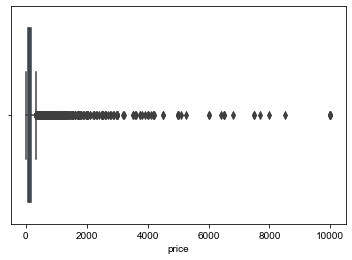

In [7]:
sns.boxplot(x=df["price"])
sns.set_theme(style="whitegrid")

In [8]:
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(16)

,Total,Percent
reviews_per_month,10052,0.205583
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
room_type,0,0.000000
price,0,0.000000
minimum_nights,0,0.000000
number_of_reviews,0,0.000000
calculated_host_listings_count,0,0.000000


In [10]:
(df == 0).sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                11
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

In [11]:
df['price'].replace(0, df.price.mean(), inplace=True)
(df == 0).sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                 10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                  17533
dtype: int64

In [12]:
df.shape

(48895, 11)

In [13]:
df.fillna({'reviews_per_month':0}, inplace=True)
df.reviews_per_month.isnull().sum()

0

In [14]:
minimum_price = np.min(prices)
maximum_price = np.max(prices)

mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

first_quartile = np.percentile(prices, 25)
third_quartile = np.percentile(prices, 75)
inter_quartile = third_quartile - first_quartile

In [15]:
print("Statistics for NYC Airbnb dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))
print("First quartile of prices: ${:,.2f}".format(first_quartile))
print("Second quartile of prices: ${:,.2f}".format(third_quartile))
print("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))

Statistics for NYC Airbnb dataset:

Minimum price: $10.00
Maximum price: $10,000.00
Mean price: $152.76
Median price $106.00
Standard deviation of prices: $240.14
First quartile of prices: $69.00
Second quartile of prices: $175.00
Interquartile (IQR) of prices: $106.00


In [16]:
df['price'].describe()

count    48895.000000
mean       152.755045
std        240.143242
min         10.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


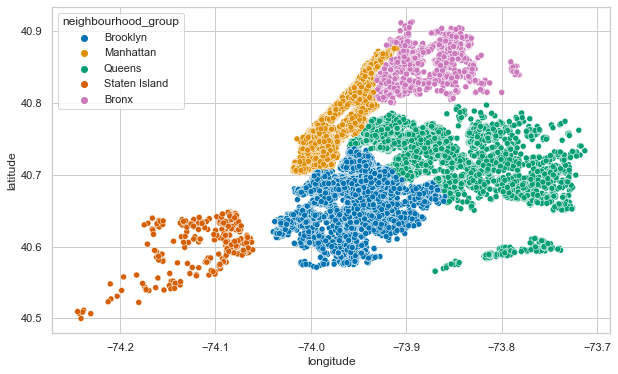

In [17]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.neighbourhood_group,palette='colorblind')
plt.ioff()

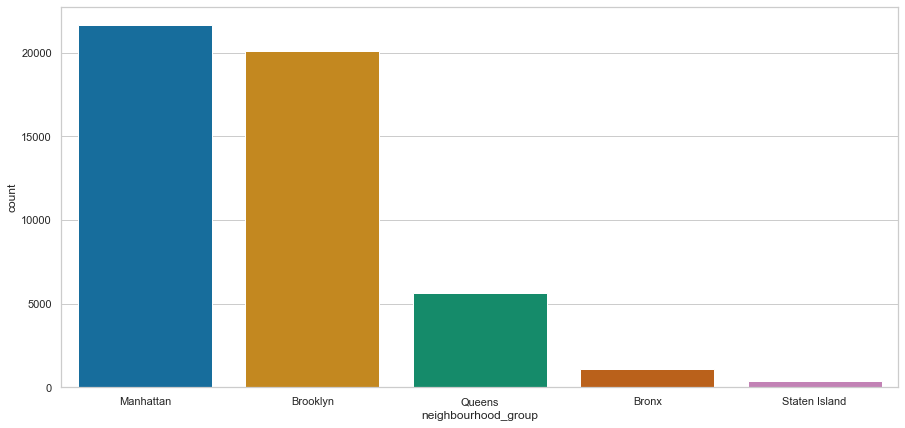

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(x="neighbourhood_group", data=df,
            order=df["neighbourhood_group"].value_counts().index,
            palette='colorblind')
plt.show()

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


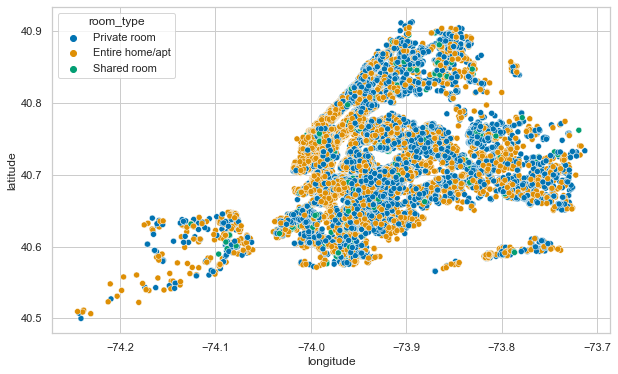

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude, df.latitude, hue=df.room_type, palette='colorblind')
plt.ioff()

C:\Users\derek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


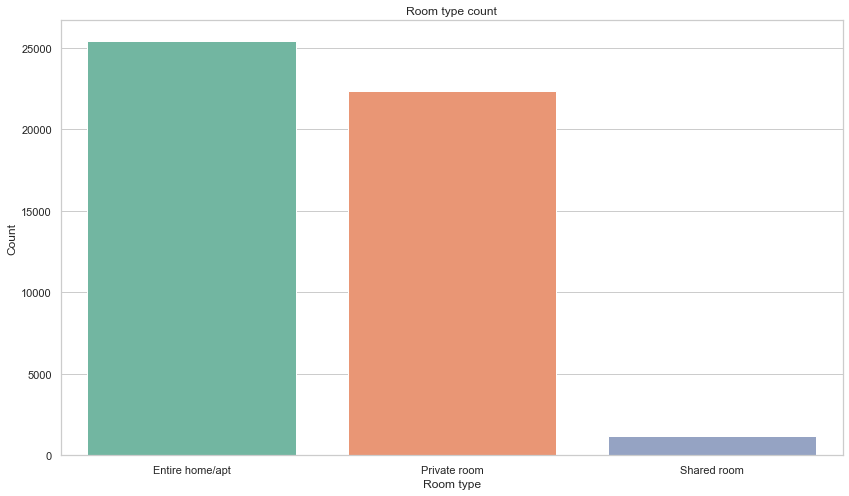

In [20]:
plt.figure(figsize=(14,8))
sns.countplot(df.sort_values('room_type').room_type,palette='Set2')
plt.title('Room type count')
plt.xlabel('Room type')
plt.ylabel('Count')
plt.show()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   reviews_per_month               48895 non-null  float64
 9   calculated_host_listings_count  48895 non-null  int64  
 10  availability_365                48895 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 4.1+ MB


In [22]:
# Import label encoder 

label_encoder = preprocessing.LabelEncoder()

df['neighbourhood_group']= label_encoder.fit_transform(df['neighbourhood_group']) 
df['neighbourhood']= label_encoder.fit_transform(df['neighbourhood']) 
df['room_type']= label_encoder.fit_transform(df['room_type']) 

C:\Users\derek\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


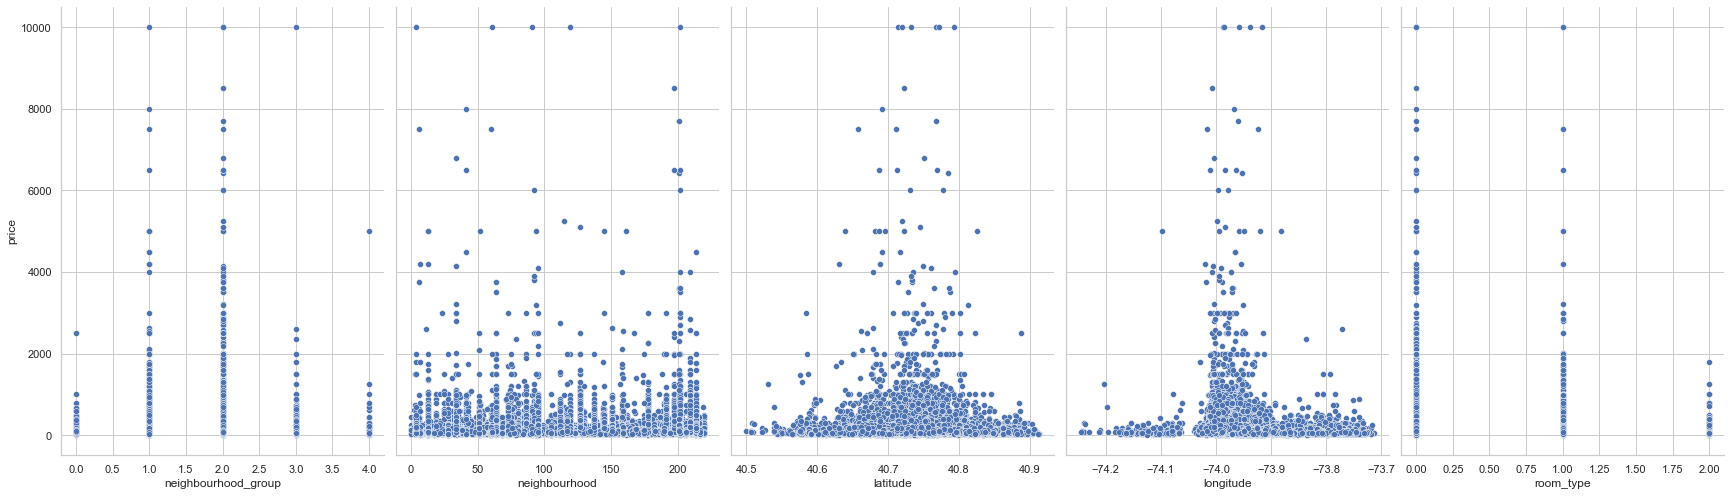

In [23]:
sns.pairplot(df, x_vars=['neighbourhood_group', 'neighbourhood', 'latitude','longitude','room_type'], y_vars='price', size=7, aspect=0.7)

C:\Users\derek\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


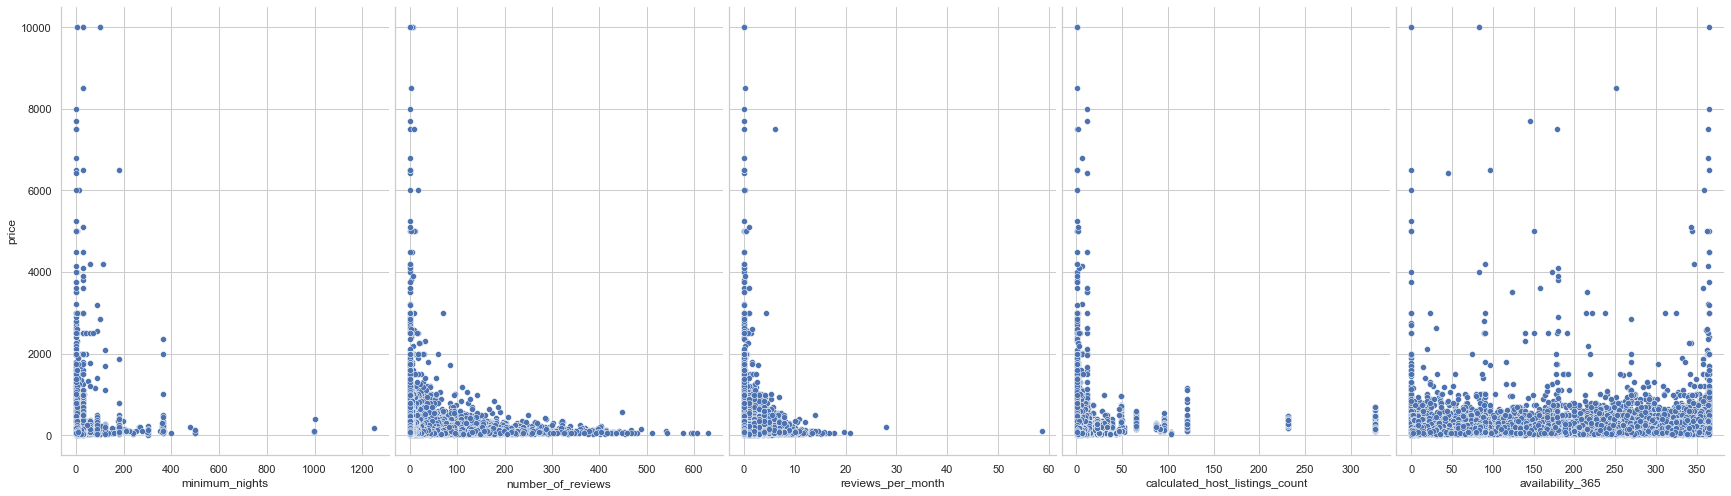

In [24]:
sns.pairplot(df, x_vars=['minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365'], y_vars='price', size=7, aspect=0.7)

In [25]:


regs = smf.ols(formula='price ~ latitude + longitude + room_type + minimum_nights + availability_365', data=df).fit()
regs.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     905.4
Date:                Wed, 02 Mar 2022   Prob (F-statistic):               0.00
Time:                        20:59:59   Log-Likelihood:            -3.3522e+05
No. Observations:               48895   AIC:                         6.704e+05
Df Residuals:                   48889   BIC:                         6.705e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -5.407e+04   1940.384    -27.863      0.000   -5.79e+04   -5.03e+04
latitude           204.6043     19.138     10.691      0.000     167.094     242.115
longitude         -620.8811     23.114    -26.862      0.000    -666.185    -575.578
room_type         -101.0187      1.942    -52.014      0.000    -104.825     -97.212
minimum_nights       0.0490      0.051      0.951      0.341      -0.052       0.150
availability_365     0.1766      0.008     22.030      0.000       0.161       0.192
==============================================================================
Omnibus:                   109722.610   Durbin-Watson:                   1.845
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        949954485.480
Skew:                          21.148   Prob(JB):                         0.00
Kurtosis:                     684.538   Cond. No.                     3.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\Users\derek\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


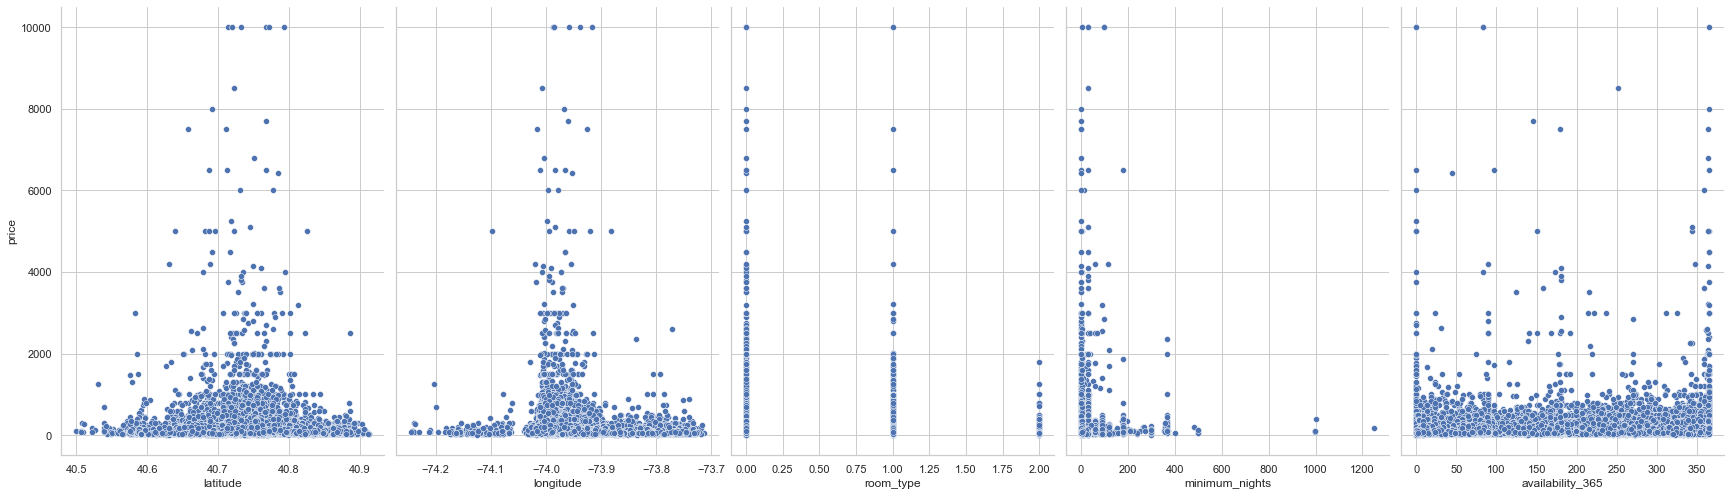

In [26]:
sns.pairplot(df, x_vars=['latitude','longitude', 'room_type','minimum_nights','availability_365'], y_vars='price', size=7, aspect=0.7)

In [27]:
features = ['latitude','longitude', 'room_type','minimum_nights','availability_365']

X = df[features]
y = df['price']

<AxesSubplot:>

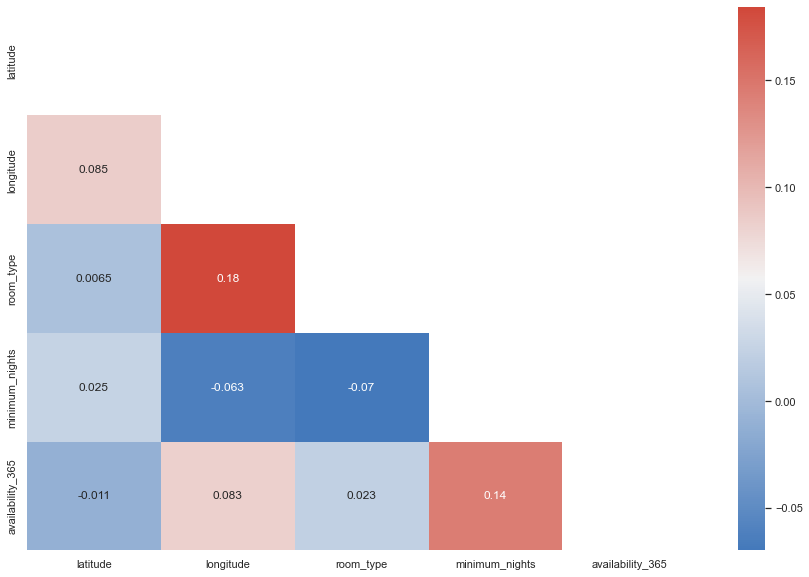

In [28]:
corr = X.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(250, 15, as_cmap=True)

plt.subplots(figsize=(15,10))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True )

### Apply Machine Learning Model

In [29]:
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 500)

In [31]:
# Linear regression in scikit-learn
reg = LinearRegression()
reg.fit(X_train, y_train)
score = reg.score(X_test,y_test)
print('Model Score {:.3f}'.format(score)) 

Model Score 0.124


In [32]:
# ## Flag intermediate output
# from sklearn.metrics import r2_score

# show_steps = True   # for testing/debugging
# # show_steps = False  # without showing steps

# ## Use Forward Feature Selection to pick a good model

# # start with no predictors
# included = []
# # keep track of model and parameters
# best = {'feature': '', 'r2': 0, 'a_r2': 0}
# # create a model object to hold the modelling parameters

# # create a model for Linear Regression
# model = LinearRegression()
# # get the number of cases in the training data
# n = X_train.shape[0]

# while True:
#     changed = False
    
#     if show_steps:
#         print('') 

#     # list the features to be evaluated
#     excluded = list(set(X.columns) - set(included))
    
#     if show_steps:
#         print('(Step) Excluded = %s' % ', '.join(excluded))  

#     # for each remaining feature to be evaluated
#     for new_column in excluded:
        
#         if show_steps:
#             print('(Step) Trying %s...' % new_column)
#             print('(Step) - Features = %s' % ', '.join(included + [new_column]))

#         # fit the model with the Training data
#         fit = model.fit(X_train[included + [new_column]],y_train) # fit a model; consider which predictors should be included
#         # calculate the score (R^2 for Regression)
#         r2 = fit.score(X_train[included + [new_column]],y_train) # calculate the score
#         # number of predictors in this model
#         k = len(included + [new_column])
#         # calculate the adjusted R^2
#         adjusted_r2 = 1 - (1-r2)*(n-1)/(n-k-1) # calculate the Adjusted R^2
        
#         if show_steps:
#             print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
#                   (adjusted_r2, best['a_r2']))

#         # if model improves
#         if adjusted_r2 > best['a_r2']:
#             # record new parameters
#             best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
#             # flag that found a better model
#             changed = True
#             if show_steps:
#                 print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
#                       (best['feature'], best['r2'], best['a_r2']))
#     # END for

#     # if found a better model after testing all remaining features
#     if changed:
#         # update control details
#         included.append(best['feature'])
#         excluded = list(set(excluded) - set(best['feature']))
#         print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
#               (best['feature'], best['r2'], best['a_r2']))
#     else:
#         # terminate if no better model
#         break

# print('')
# print('Resulting features:')
# print(', '.join(included))

C:\Users\derek\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


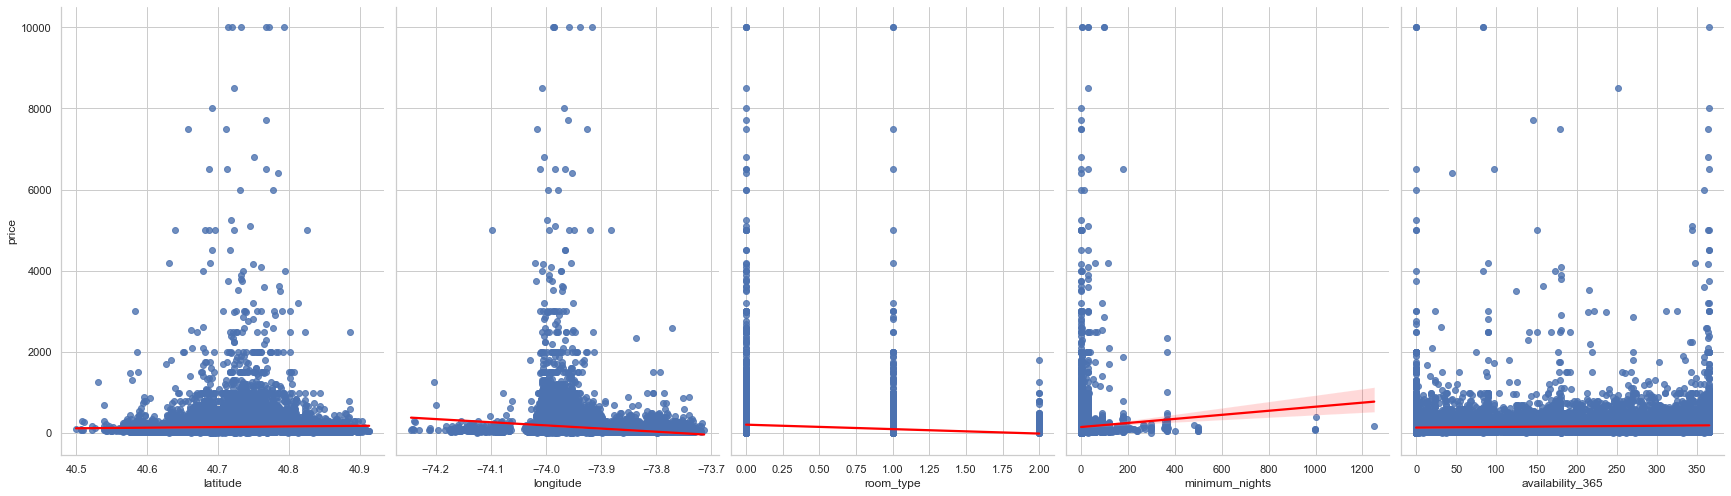

In [33]:
sns.pairplot(df, x_vars=['latitude','longitude', 'room_type','minimum_nights','availability_365'], y_vars='price', size=7, aspect=0.7, kind='reg', 
                 plot_kws={'line_kws':{'color':'red'}})


In [34]:
#Interpreting model coefficients
print(reg.intercept_)

-54139.10216066773


In [35]:
# make predictions on the testing set
y_pred = reg.predict(X_test)

In [36]:
mean_squared_error(y_test, y_pred)

33414.98947396637

In [38]:
# CV KFold object with 5splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 500)
Test_score = cross_val_score(reg, X_test, y_test, scoring='r2', cv=folds)
Train_score = cross_val_score(reg, X_train, y_train, scoring='r2', cv=folds)
results = cross_val_score(reg, X_train, y_train, cv = folds)
print('Test Score with CV =',Test_score)  
print('Train Score with CV =',Train_score) 
print('Linear Regression, Cross-Validation Mean Score: %.4f' % results.mean())

Test Score with CV = [0.14674162 0.09000172 0.18408251 0.1600858  0.09915317]
Train Score with CV = [0.0663044  0.14350955 0.09537528 0.06429441 0.06497465]
Linear Regression, Cross-Validation Mean Score: 0.0869


### Flask

In [ ]:
import joblib
joblib.dump(reg,'linear_regression_model.pkl')